In [1]:
import numpy as np
from numpy.random import seed
from numpy.random import randint
import matplotlib.pyplot as plt
%matplotlib inline
import sys
import pandas as pd
import wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)
from pprint import pprint
import re
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator
import nltk
import seaborn as sns
from collections import Counter
nltk.download('stopwords')
from nltk.corpus import stopwords
import funciones as fn

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\JOSE\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df = fn.limpieza_base(pd.read_excel('Agosto.xlsx'))
df

C:\Users\JOSE\anaconda3\envs\nltkenv\lib\site-packages\openpyxl\styles\stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


Query_Name                   Date  \
0      [Q] Barómetro migrante Colombia  2021-08-25 23:59:54.0   
1      [Q] Barómetro migrante Colombia  2021-08-25 23:59:12.0   
2      [Q] Barómetro migrante Colombia  2021-08-25 23:58:43.0   
3      [Q] Barómetro migrante Colombia  2021-08-25 23:58:41.0   
4      [Q] Barómetro migrante Colombia  2021-08-25 23:58:27.0   
...                                ...                    ...   
63454  [Q] Barómetro migrante Colombia  2021-07-25 00:00:00.0   
63455  [Q] Barómetro migrante Colombia  2021-07-25 00:00:00.0   
63456  [Q] Barómetro migrante Colombia  2021-07-25 00:00:00.0   
63457  [Q] Barómetro migrante Colombia  2021-07-25 00:00:00.0   
63458  [Q] Barómetro migrante Colombia  2021-07-25 00:00:00.0   

                                                   Title  \
0      Gobierno de Duque prorrogó una medida que bene...   
1      RT @CostaNoticiasTV Autoridades colombiana det...   
2      🔴 ¿Qué buscaba supuesto espía sirio con cédula...   
3      RT @CostaNoticiasTV Autoridades colombiana det...   
4      RT @andino_santana @HoyPalestina @mariluguzman...   
...                                                  ...   
63454  Colombia recibió 3.5 millones de vacunas de Mo...   
63455  Colombia recibirá 3,5 millones de vacunas de M...   
63456  Obligadas a huir de su país, cada vez más vene...   
63457  Después de haber regresado a su país por la pa...   
63458  Arribaron a Colombia las 3.5 millones de vacun...   

                                                 Snippet  \
0      ...necesario: Que ambos padres sean venezolano...   
1      RT @CostaNoticiasTV Autoridades colombiana det...   
2      🔴 ¿Qué buscaba supuesto espía sirio con cédula...   
3      RT @CostaNoticiasTV Autoridades colombiana det...   
4      RT @andino_santana @HoyPalestina @mariluguzman...   
...                                                  ...   
63454  ...Tapabocas, ¿Niños y docentes vacunados no d...   
63455  ...la Fuerza Aérea Colombiana (FAC). Lea tambi...   
63456  Obligadas a huir de su país, cada vez más vene...   
63457  Después de haber regresado a su país por la pa...   
63458  ...el pasado 1 de julio, las cuales también do...   

                                                     Url        Domain  \
0      https://www.ntn24.com/programas/la-tarde/ninos...     ntn24.com   
1      http://twitter.com/dimexcortes/statuses/143068...   twitter.com   
2      http://twitter.com/Citytv/statuses/14306810755...   twitter.com   
3      http://twitter.com/guapanelo45/statuses/143068...   twitter.com   
4      http://twitter.com/ESPIRALINFINITA/statuses/14...   twitter.com   
...                                                  ...           ...   
63454  https://www.lafm.com.co/colombia/llevaron-colo...   lafm.com.co   
63455  https://www.lafm.com.co/colombia/colombia-reci...   lafm.com.co   
63456  http://twitter.com/Pacifistacol/statuses/14190...   twitter.com   
63457  http://twitter.com/EELadoalado/statuses/141908...   twitter.com   
63458  https://www.rcnradio.com/salud/arribaron-colom...  rcnradio.com   

      Sentiment Page_Type Language Country_Code  ...  \
0      negative      news       es          COL  ...   
1       neutral   twitter       es          COL  ...   
2       neutral   twitter       es          COL  ...   
3       neutral   twitter       es          COL  ...   
4      negative   twitter       es          COL  ...   
...         ...       ...      ...          ...  ...   
63454   neutral      news       es          COL  ...   
63455   neutral      news       es          COL  ...   
63456   neutral   twitter       es          COL  ...   
63457   neutral   twitter       es          COL  ...   
63458   neutral      news       es          COL  ...   

      Sector_privado_hashtags_-_#TerritoriosDeConfianza  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3      

In [3]:
for col in df.columns:
    print(col)

Query_Name
Date
Title
Snippet
Url
Domain
Sentiment
Page_Type
Language
Country_Code
Continent_Code
Continent
Country
City_Code
Account_Type
Added
Assignment
Author
Avatar
Category_Details
Checked
City
Display_URLs
Expanded_URLs
Facebook_Author_ID
Facebook_Comments
Facebook_Likes
Facebook_Role
Facebook_Shares
Facebook_Subtype
Full_Name
Full_Text
Gender
Hashtags
Impact
Impressions
Instagram_Comments
Instagram_Followers
Instagram_Following
Instagram_Interactions_Count
Instagram_Likes
Instagram_Posts
Interest
Last_Assignment_Date
Latitude
Location_Name
Longitude
Media_Filter
Media_URLs
Mentioned_Authors
Original_Url
Priority
Professions
Resource_Id
Short_URLs
Starred
Status
Subtype
Tags
Thread_Author
Thread_Created_Date
Thread_Entry_Type
Thread_Id
Thread_URL
Total_Monthly_Visitors
Twitter_Author_ID
Twitter_Channel_Role
Twitter_Followers
Twitter_Following
Twitter_Reply_Count
Twitter_Reply_to
Twitter_Retweet_of
Twitter_Retweets
Twitter_Tweets
Twitter_Verified
Updated
Reach_(new)
BM_2021_-_Afi

In [4]:
copia = df[['Snippet', 'Author']]
copia

Snippet           Author
0      ...necesario: Que ambos padres sean venezolano...              NaN
1      RT @CostaNoticiasTV Autoridades colombiana det...      dimexcortes
2      🔴 ¿Qué buscaba supuesto espía sirio con cédula...           Citytv
3      RT @CostaNoticiasTV Autoridades colombiana det...      guapanelo45
4      RT @andino_santana @HoyPalestina @mariluguzman...  ESPIRALINFINITA
...                                                  ...              ...
63454  ...Tapabocas, ¿Niños y docentes vacunados no d...              NaN
63455  ...la Fuerza Aérea Colombiana (FAC). Lea tambi...              NaN
63456  Obligadas a huir de su país, cada vez más vene...     Pacifistacol
63457  Después de haber regresado a su país por la pa...      EELadoalado
63458  ...el pasado 1 de julio, las cuales también do...     Martha Olaya

[63459 rows x 2 columns]

In [5]:
bots = pd.read_excel('detalle_usuarios.xlsx')
bots

Autores  Valores     Rango
0           rcnmundo      4.4  Muy Alta
1        Johappatino      0.7  Muy Baja
2       JavierAdaime      0.8  Muy Baja
3      MarioRobertoP      0.8  Muy Baja
4       PuraMenteInn      1.3      Baja
..               ...      ...       ...
551     ClaudiaLopez      1.8      Baja
552   sergio_geribon      1.1      Baja
553     CarlosLealVE      0.2  Muy Baja
554  marvilrodriguez      1.0  Muy Baja
555    Jmherrera1021      0.8  Muy Baja

[556 rows x 3 columns]

In [6]:
mergedf = pd.merge(bots, copia, how='left', left_on='Autores', right_on='Author')
mergedf

Autores  Valores     Rango  \
0          rcnmundo      4.4  Muy Alta   
1          rcnmundo      4.4  Muy Alta   
2          rcnmundo      4.4  Muy Alta   
3          rcnmundo      4.4  Muy Alta   
4          rcnmundo      4.4  Muy Alta   
...             ...      ...       ...   
4815  Jmherrera1021      0.8  Muy Baja   
4816  Jmherrera1021      0.8  Muy Baja   
4817  Jmherrera1021      0.8  Muy Baja   
4818  Jmherrera1021      0.8  Muy Baja   
4819  Jmherrera1021      0.8  Muy Baja   

                                                Snippet         Author  
0     Más de 360 venezolanos han sido asesinados est...       rcnmundo  
1     Prorrogan medida para nacionalizar a hijos de ...       rcnmundo  
2     Joven venezolana Glass Marcano dirigirá este v...       rcnmundo  
3     Venezolano se hizo pasar por paciente para aca...       rcnmundo  
4     Colectivos de mujeres venezolanas protestan po...       rcnmundo  
...                                                 ...            ...  
4815  Si saben en dónde están los hptas venecos, por...  Jmherrera1021  
4816  No condene el asesinato, saque a toda esa plag...  Jmherrera1021  
4817            Hptas venecos deberían irse a la mierda  Jmherrera1021  
4818  RT @kevincl28 Por fin Migración y Policía, rea...  Jmherrera1021  
4819  RT @USEmbassyBogota "La vacuna Moderna permiti...  Jmherrera1021  

[4820 rows x 5 columns]

In [7]:
mergedf.dropna(subset = ['Snippet'], inplace=True)
mergedf

Autores  Valores     Rango  \
0          rcnmundo      4.4  Muy Alta   
1          rcnmundo      4.4  Muy Alta   
2          rcnmundo      4.4  Muy Alta   
3          rcnmundo      4.4  Muy Alta   
4          rcnmundo      4.4  Muy Alta   
...             ...      ...       ...   
4815  Jmherrera1021      0.8  Muy Baja   
4816  Jmherrera1021      0.8  Muy Baja   
4817  Jmherrera1021      0.8  Muy Baja   
4818  Jmherrera1021      0.8  Muy Baja   
4819  Jmherrera1021      0.8  Muy Baja   

                                                Snippet         Author  
0     Más de 360 venezolanos han sido asesinados est...       rcnmundo  
1     Prorrogan medida para nacionalizar a hijos de ...       rcnmundo  
2     Joven venezolana Glass Marcano dirigirá este v...       rcnmundo  
3     Venezolano se hizo pasar por paciente para aca...       rcnmundo  
4     Colectivos de mujeres venezolanas protestan po...       rcnmundo  
...                                                 ...            ...  
4815  Si saben en dónde están los hptas venecos, por...  Jmherrera1021  
4816  No condene el asesinato, saque a toda esa plag...  Jmherrera1021  
4817            Hptas venecos deberían irse a la mierda  Jmherrera1021  
4818  RT @kevincl28 Por fin Migración y Policía, rea...  Jmherrera1021  
4819  RT @USEmbassyBogota "La vacuna Moderna permiti...  Jmherrera1021  

[4726 rows x 5 columns]

In [8]:
#Eliminamos los URL: Todo lo que empieza por  HTTP
mergedf['Clean_Text']=mergedf['Snippet'].replace(r"http\S+", '', regex=True)
#Eliminamos todos los hashtags
mergedf['Clean_Text']=mergedf['Clean_Text'].replace('#\\w+', '', regex=True)
#Eliminamos los signos de puntuación repetidos dentro de los tweets
mergedf['Clean_Text']=mergedf['Clean_Text'].replace(r'([^0-9a-zA-Z])\1+', r'\1', regex=True)
#Eliminamos los signos de puntuación al inicio de un tweet
mergedf['Clean_Text']=mergedf['Clean_Text'].replace(r'^[^0-9a-zA-Z@#]+', '', regex=True)
#Eliminamos los dobles espacios
mergedf['Clean_Text']=mergedf['Clean_Text'].replace(r'()\1+', r'\1\1', regex=True)
#Eliminamos las letras repetivas dentro de las palabras
mergedf['Clean_Text']=mergedf['Clean_Text'].replace(r'(.)\1+', r'\1\1', regex=True)
# Quitar las comillas de los textos
mergedf['Clean_Text']=mergedf['Clean_Text'].replace('"', '', regex=True)
# Remover puntuaciones innecesarias
mergedf['Clean_Text'] = mergedf['Clean_Text'].map(lambda x: re.sub('[,\.!?]', '', x))
mergedf['Clean_Text']=mergedf['Clean_Text'].str.replace('RT', '')
# Remover mayúsculas de inicio de texto
mergedf['Clean_Text'] = mergedf['Clean_Text'].map(lambda x: x.lower())
#Autores
mergedf['Clean_Text']=mergedf['Clean_Text'].replace(r'@\w+', '', regex=True)
mergedf['Clean_Text']=mergedf['Clean_Text'].str.replace('rt', '')
#Espacios
mergedf['Clean_Text']=mergedf['Clean_Text'].str.strip()
mergedf['Clean_Text']=mergedf['Clean_Text'].replace('Document_No', '')
# Exclude stopwords 
spanish_stopwords=stopwords.words('spanish')
spanish_stopwords.extend(['ser', 'haber'])
#spanish_stopwords.extend(usuarios)
spanish_stopwords.remove('no')
spanish_stopwords.remove('ni')
mergedf['Clean_Text_no_stopwords'] = mergedf['Clean_Text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (spanish_stopwords) and len(word)>1]))

In [9]:
mergedf

Autores  Valores     Rango  \
0          rcnmundo      4.4  Muy Alta   
1          rcnmundo      4.4  Muy Alta   
2          rcnmundo      4.4  Muy Alta   
3          rcnmundo      4.4  Muy Alta   
4          rcnmundo      4.4  Muy Alta   
...             ...      ...       ...   
4815  Jmherrera1021      0.8  Muy Baja   
4816  Jmherrera1021      0.8  Muy Baja   
4817  Jmherrera1021      0.8  Muy Baja   
4818  Jmherrera1021      0.8  Muy Baja   
4819  Jmherrera1021      0.8  Muy Baja   

                                                Snippet         Author  \
0     Más de 360 venezolanos han sido asesinados est...       rcnmundo   
1     Prorrogan medida para nacionalizar a hijos de ...       rcnmundo   
2     Joven venezolana Glass Marcano dirigirá este v...       rcnmundo   
3     Venezolano se hizo pasar por paciente para aca...       rcnmundo   
4     Colectivos de mujeres venezolanas protestan po...       rcnmundo   
...                                                 ...            ...   
4815  Si saben en dónde están los hptas venecos, por...  Jmherrera1021   
4816  No condene el asesinato, saque a toda esa plag...  Jmherrera1021   
4817            Hptas venecos deberían irse a la mierda  Jmherrera1021   
4818  RT @kevincl28 Por fin Migración y Policía, rea...  Jmherrera1021   
4819  RT @USEmbassyBogota "La vacuna Moderna permiti...  Jmherrera1021   

                                             Clean_Text  \
0     más de 360 venezolanos han sido asesinados est...   
1     prorrogan medida para nacionalizar a hijos de ...   
2     joven venezolana glass marcano dirigirá este v...   
3     venezolano se hizo pasar por paciente para aca...   
4     colectivos de mujeres venezolanas protestan po...   
...                                                 ...   
4815  si saben en dónde están los hptas venecos por ...   
4816  no condene el asesinato saque a toda esa plaga...   
4817            hptas venecos deberían irse a la mierda   
4818  por fin migración y policía realizan operativo...   
4819  la vacuna moderna permitirá al gobierno de col...   

                                Clean_Text_no_stopwords  
0     360 venezolanos sido asesinados año colombia s...  
1     prorrogan medida nacionalizar hijos migrantes ...  
2     joven venezolana glass marcano dirigirá vierne...  
3     venezolano hizo pasar paciente acabar golpeand...  
4     colectivos mujeres venezolanas protestan cierr...  
...                                                 ...  
4815              si saben dónde hptas venecos no actúa  
4816  no condene asesinato saque toda plaga venecos ...  
4817                 hptas venecos deberían irse mierda  
4818  fin migración policía realizan operativos semá...  
4819  vacuna moderna permitirá gobierno colombia pro...  

[4726 rows x 7 columns]

In [10]:
lista = mergedf.Rango.unique()
lista

array(['Muy Alta', 'Muy Baja', 'Baja', 'Media', 'Alta'], dtype=object)

In [11]:
print(mergedf.iloc[0][3])
print(mergedf.iloc[0][5])
print(mergedf.iloc[0][6])

Más de 360 venezolanos han sido asesinados este año en Colombia, según Codhes https://t.co/hObdTaWEro https://t.co/25WewDVirB
más de 360 venezolanos han sido asesinados este año en colombia según codhes
360 venezolanos sido asesinados año colombia según codhes


In [12]:
mergedf = mergedf[(mergedf['Rango'] == 'Muy Alta') | (mergedf['Rango'] == 'Alta')]
mergedf

Autores  Valores     Rango  \
0           rcnmundo      4.4  Muy Alta   
1           rcnmundo      4.4  Muy Alta   
2           rcnmundo      4.4  Muy Alta   
3           rcnmundo      4.4  Muy Alta   
4           rcnmundo      4.4  Muy Alta   
...              ...      ...       ...   
4748     NCAntioquia      3.4      Alta   
4749  elmeridiano_co      3.5      Alta   
4750  elmeridiano_co      3.5      Alta   
4751  elmeridiano_co      3.5      Alta   
4752  elmeridiano_co      3.5      Alta   

                                                Snippet          Author  \
0     Más de 360 venezolanos han sido asesinados est...        rcnmundo   
1     Prorrogan medida para nacionalizar a hijos de ...        rcnmundo   
2     Joven venezolana Glass Marcano dirigirá este v...        rcnmundo   
3     Venezolano se hizo pasar por paciente para aca...        rcnmundo   
4     Colectivos de mujeres venezolanas protestan po...        rcnmundo   
...                                                 ...             ...   
4748  ¿Podrán recibir la vacuna COVID-19 los venezol...     NCAntioquia   
4749  #Mundo | Es de recordar que Guevara fue deteni...  elmeridiano_co   
4750  🔴👉El Meridiano | Apuñalan a venezolano en Samp...  elmeridiano_co   
4751  #Sincelejo | Según Migración Colombia, hay 22....  elmeridiano_co   
4752  #Colombia | @infopresidencia espera recibir má...  elmeridiano_co   

                                             Clean_Text  \
0     más de 360 venezolanos han sido asesinados est...   
1     prorrogan medida para nacionalizar a hijos de ...   
2     joven venezolana glass marcano dirigirá este v...   
3     venezolano se hizo pasar por paciente para aca...   
4     colectivos de mujeres venezolanas protestan po...   
...                                                 ...   
4748  podrán recibir la vacuna covid-19 los venezola...   
4749  es de recordar que guevara fue detenido el 12 ...   
4750  el meridiano | apuñalan a venezolano en sampué...   
4751  según migración colombia hay 22557 venezolanos...   
4752  espera recibir más vacunas especialmente para ...   

                                Clean_Text_no_stopwords  
0     360 venezolanos sido asesinados año colombia s...  
1     prorrogan medida nacionalizar hijos migrantes ...  
2     joven venezolana glass marcano dirigirá vierne...  
3     venezolano hizo pasar paciente acabar golpeand...  
4     colectivos mujeres venezolanas protestan cierr...  
...                                                 ...  
4748  podrán recibir vacuna covid-19 venezolanos col...  
4749  recordar guevara detenido 12 julio efectivos s...  
4750          meridiano apuñalan venezolano sampués via  
4751  según migración colombia 22557 venezolanos res...  
4752  espera recibir vacunas especialmente dirigidas...  

[2205 rows x 7 columns]

In [13]:
series_a_str = str(mergedf["Clean_Text_no_stopwords"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Clean_Text_no_stopwords', '')

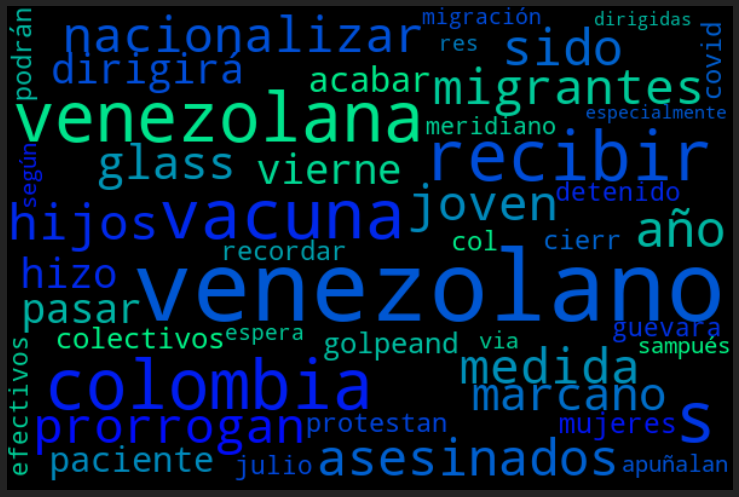

In [14]:
# Nube de palabras general
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')

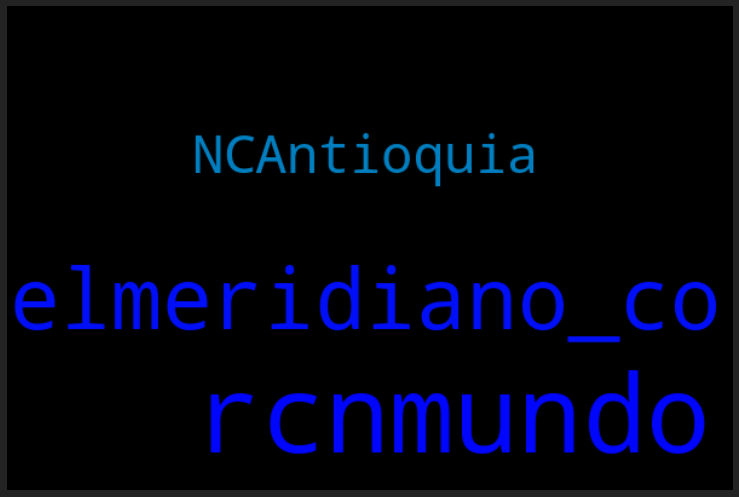

In [15]:
series_a_str = str(mergedf["Author"])
series_a_str = series_a_str.replace('Document_No', '')
series_a_str = series_a_str.replace('dtype', '')
series_a_str = series_a_str.replace('object', '')
series_a_str = series_a_str.replace('Name', '')
series_a_str = series_a_str.replace('Length', '')
series_a_str = series_a_str.replace('Author', '')
cloud=WordCloud(colormap="winter",width=600,height=400).generate(series_a_str)
fig=plt.figure(figsize=(13,18))
plt.axis("off")
plt.imshow(cloud,interpolation='bilinear')